## Average Distance from Origin

In [362]:
import random

In [39]:
def random_walk():
    position = (0,0)
    east_or_west = random.choice(["E" , "W"])
    north_or_south = random.choice(["N" , "S"])
    
    distance_x = 1
    distance_y = 1
    if east_or_west == "W":
        distance_x = -1
    if north_or_south == "S":
        distance_y = -1
    
    increment = (distance_x, distance_y)
    position = tuple(sum(x) for x in zip(position, increment))
    
    return position

In [53]:
def random_walk(position = (0,0)):
    distance_x = random.choice([-1, 1])
    distance_y = random.choice([-1 , 1])
    
    increment = (distance_x, distance_y)
    position = tuple(sum(x) for x in zip(position, increment))
    
    return position

In [58]:
random_walk()

(-1, -1)

#### Classes

In [184]:
class Location(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def get_x(self):
        return self.x
    def get_y(self):
        return self.y
    
    def move(self, delta_x, delta_y):
        new_location = Location(self.x + delta_x, self.y + delta_y)
        return new_location
    
    def distance_from(self, other):
        diff_x = self.x - other.get_x()
        diff_y = self.y - other.get_y()
        return (diff_x**2 + diff_y**2)**0.5
    
    def __str__(self):
        return '(' + str(self.x) + ',' + str(self.y) + ')'

In [85]:
class Drunk(object):
    def __init__(self, name= None):
        self.name = name
        
    def __str__(self):
        if self.name != None:
            return self.name
        return 'Anonymous'

In [351]:
class Random_Drunk(Drunk):
    def take_step(self):
        choices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(choices)

In [352]:
class Northward_Drunk(Drunk):
    def take_step(self):
        choices = [(0.0,1.1), (0.0,-0.9), (1.0,0.0), (-1.0,0.0)]
        return random.choice(choices)

Field class will be a dictionary and map a drunk to his/her location on the field

In [397]:
class Field(object):
    def __init__(self):
        self.drunks = {}
    
    def add_drunk(self, drunk, location): #drunk object and location object as arguments
        if drunk in self.drunks:
            raise ValueError('Drunk already present')
        else:
            self.drunks[drunk] = location #as drunk object is used as a key in a dictionary, it should be immutable
    
    def get_location(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]
    
    def move_drunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk to field mei hai hi nahi mere dost.')
        delta_x, delta_y = drunk.take_step()
        #use move method of Location to change location
        self.drunks[drunk] = self.drunks[drunk].move(delta_x, delta_y)
        

##### Random Walk

In [215]:
def random_walk(field, drunk, steps):
    #returns location object. 
    #location class has method to get distance between location objects so we don't have to get x and y coordinates separately
    initial_location = field.get_location(drunk)
    
    for step in range(steps):
        field.move_drunk(drunk)
    
    final_location = field.get_location(drunk)
    
    distance_covered = initial_location.distance_from(final_location)
    
    return distance_covered
     

In [166]:
def walk_simulation(steps, trials, drunk_class):
    drunk = drunk_class()
    origin = Location(0,0)
    distances=[]
    for trial in range(trials):
        f = Field() #we can always create a new field for a new simulation so we don't need to specify a field in the arguments
        f.add_drunk(drunk, origin)
        distance = round(random_walk(f, drunk, steps))
        distances.append(distance)
    return distances

In [410]:
def drunk_test(walk_lengths, trials, drunk_class):
    means=[]
    for steps in walk_lengths:
        distances = walk_simulation(steps, trials, drunk_class)
        mean = round(sum(distances)/len(distances),4)
        max_distance = max(distances)
        min_distance = min(distances)
        means.append(mean)
        
        print(drunk_class.__name__ + ' Max =' + str(max_distance)+ ', Min = ' + str(min_distance) + ', Mean = ' + str(mean))

In [296]:
random.seed(0)

##### Drunk tests for multiple walks

In [297]:
drunk_test([10, 100, 1000, 10000], 1000, Random_Drunk)

Random_Drunk Max =8, Min = 0, Mean = 2.626
Random_Drunk Max =31, Min = 0, Mean = 8.906
Random_Drunk Max =86, Min = 1, Mean = 28.427
Random_Drunk Max =284, Min = 1, Mean = 86.823


In [398]:
drunk_test([10, 100, 1000, 10000], 1000, Northward_Drunk)

Northward_Drunk Max =8, Min = 0, Mean = 2.9
Northward_Drunk Max =36, Min = 0, Mean = 9.777
Northward_Drunk Max =116, Min = 3, Mean = 55.522
Northward_Drunk Max =741, Min = 217, Mean = 503.359


##### Distances covered vs the Number of steps taken

In [417]:
rand = drunk_test(list(range(0,10000,200)), 1000, Random_Drunk)
north = drunk_test(list(range(0,10000,200)), 1000, Northward_Drunk)

In [420]:
step_root = [x**0.5 for x in list(range(0,10000,200))]

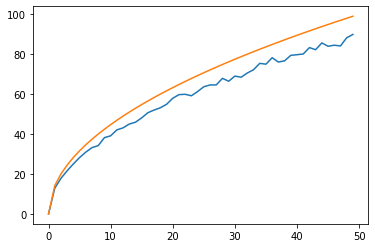

In [421]:
plt.plot(rand)
#plt.plot(north)
plt.plot(step_root)

In [454]:
steps_5_perc = [0.05*x for x in list(range(0,10000,200))]

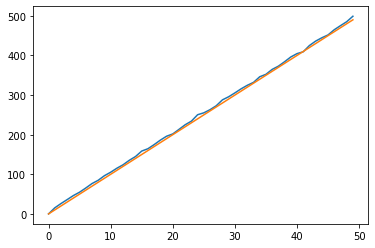

In [455]:
plt.plot(north)
plt.plot(steps_5_perc)

##### Distribution of final positions

In [428]:
def random_walk_position(field, drunk, steps):
    #returns location object. 
    #location class has method to get distance between location objects so we don't have to get x and y coordinates separately 
    for step in range(steps):
        field.move_drunk(drunk)
    
    final_location = field.get_location(drunk)
    
    return final_location
     

In [561]:
def walk_simulation_position(steps, trials, drunk_class):
    drunk = drunk_class()
    origin = Location(0,0)
    positions=[]
    for trial in range(trials):
        f = Field() #we can always create a new field for a new simulation so we don't need to specify a field in the arguments
        f.add_drunk(drunk, origin)
        position = random_walk_position(f, drunk, steps)
        positions.append(position)
    return positions

In [487]:
p_rand = walk_simulation_position(10000, 1000, Random_Drunk)

In [488]:
x_coordinates_rand = []
y_coordinates_rand = []
for location in p_rand:
    x_coord = location.get_x()
    y_coord = location.get_y()
    
    x_coordinates_rand.append(x_coord)
    y_coordinates_rand.append(y_coord)

In [490]:
p_north = walk_simulation_position(10000, 1000, Northward_Drunk)

In [491]:
x_coordinates_north = []
y_coordinates_north = []
for location in p_north:
    x_coord = location.get_x()
    y_coord = location.get_y()
    
    x_coordinates_north.append(x_coord)
    y_coordinates_north.append(y_coord)

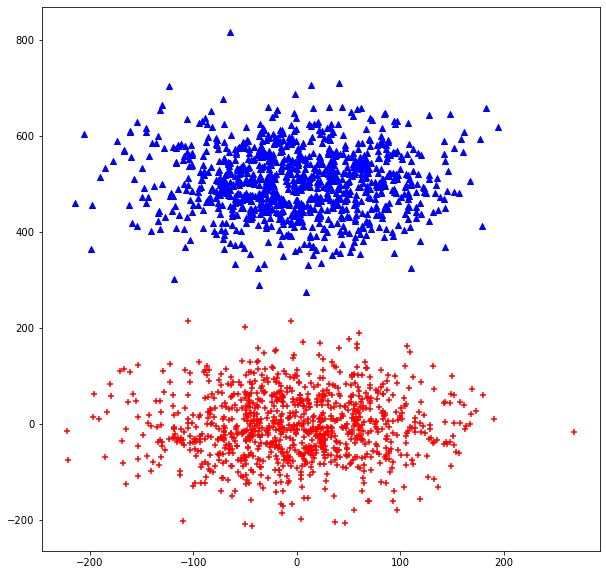

In [498]:
plt.figure(figsize=(10,10))
plt.scatter(x_coordinates_rand, y_coordinates_rand, c='r', marker='+')
plt.scatter(x_coordinates_north, y_coordinates_north, c='b', marker = '^')

In [469]:
sum(x_coordinates_rand)/len(x_coordinates_rand)

-0.07

In [474]:
sum(y_coordinates_rand)/len(y_coordinates_rand)

0.098

In [475]:
sum(x_coordinates_north)/len(x_coordinates_north)

0.159

In [476]:
sum(y_coordinates_north)/len(y_coordinates_north)

4.663499999999997

The means of x and y corrdinates are almost zero and visually the data is centered around zero, as it should be. The higher the number of steps, the more will be the spread of the data.
In the northward drunk simulation, the bias is in the Northward direction.

### Field with Wormholes

In [557]:
class Odd_Field(Field):
    def __init__(self, holes = 5, x_range = 100, y_range = 100):
        #as we will initialise the odd field we need to create a Field as well to create the self.drunks dict
        Field.__init__(self) 
        self.wormholes = {}
        for hole in range(holes):
            x = random.randint(-x_range, x_range)
            y = random.randint(-y_range, y_range)
            
            new_x = random.randint(-x_range, x_range)
            new_y = random.randint(-y_range, y_range)
            
            new_loc = Location(new_x, new_y)
            self.wormholes[(x,y)] = new_loc
    
    def move_drunk(self, drunk):
        Field.move_drunk(self, drunk) 
        x = self.drunks[drunk].get_x()
        y = self.drunks[drunk].get_y()
        
        if (x,y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x,y)]

The function walk_simulation is changed to include Odd Field below

In [587]:
def walk_simulation_position(steps, trials, drunk_class):
    drunk = drunk_class()
    origin = Location(0,0)
    positions=[]
    for trial in range(trials):
        f = Odd_Field() #odd field instead of normal field
        f.add_drunk(drunk, origin)
        position = random_walk_position(f, drunk, steps)
        positions.append(position)
    return positions

In [588]:
p_odd = walk_simulation_position(500, 1000, Random_Drunk)

In [589]:
x_coordinates_odd= []
y_coordinates_odd = []
for location in p_odd:
    x_coord = location.get_x()
    y_coord = location.get_y()
    
    x_coordinates_odd.append(x_coord)
    y_coordinates_odd.append(y_coord)

Normal function is initialised below again

In [590]:
def walk_simulation_position(steps, trials, drunk_class):
    drunk = drunk_class()
    origin = Location(0,0)
    positions=[]
    for trial in range(trials):
        f = Field() #we can always create a new field for a new simulation so we don't need to specify a field in the arguments
        f.add_drunk(drunk, origin)
        position = random_walk_position(f, drunk, steps)
        positions.append(position)
    return positions

In [592]:
p_norm = walk_simulation_position(500, 1000, Random_Drunk)
x_coordinates_norm= []
y_coordinates_norm = []
for location in p_norm:
    x_coord = location.get_x()
    y_coord = location.get_y()
    
    x_coordinates_norm.append(x_coord)
    y_coordinates_norm.append(y_coord)

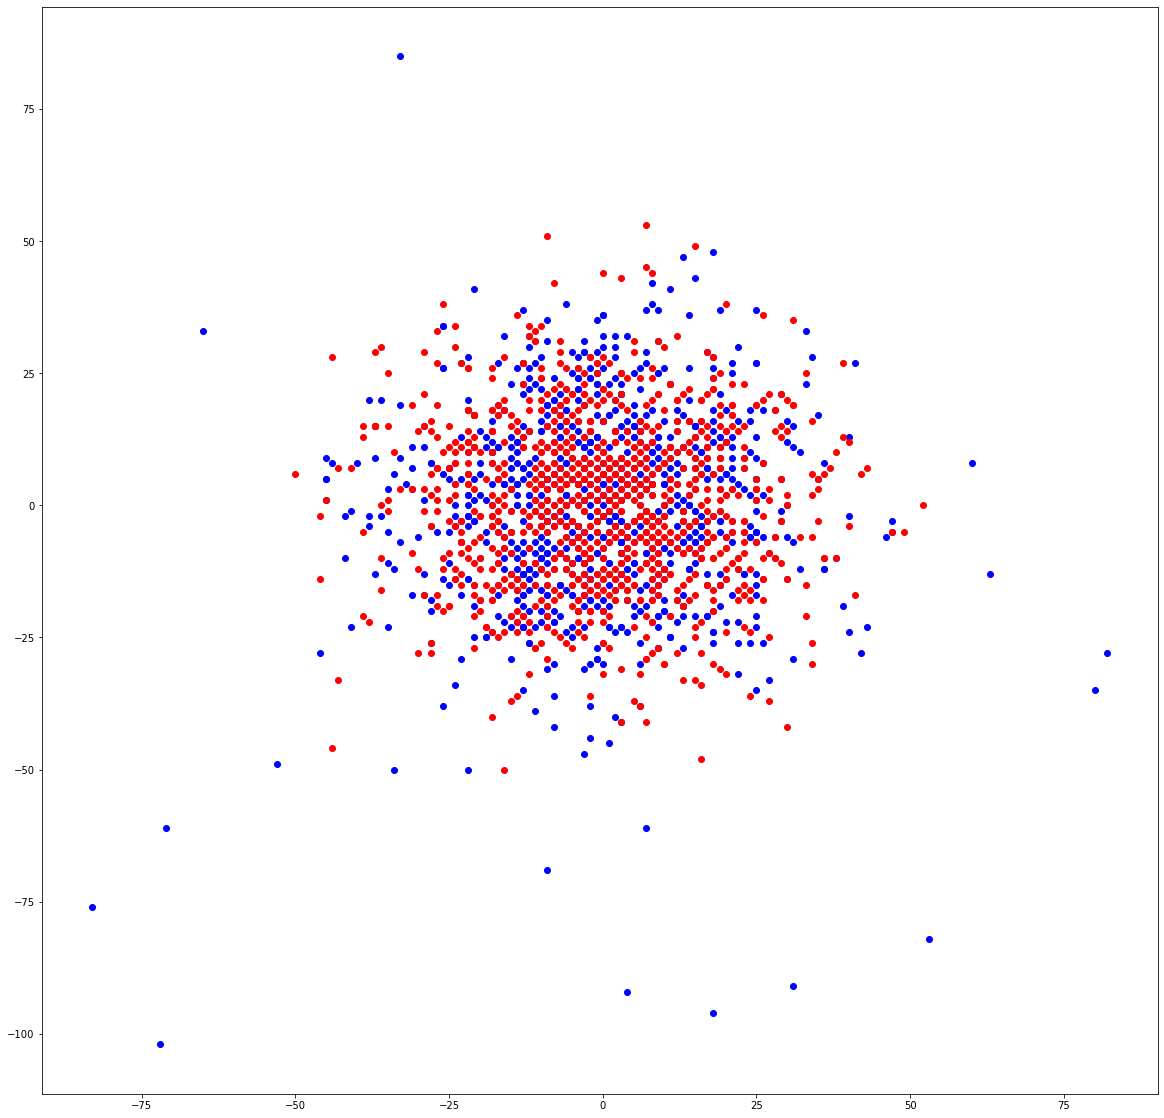

In [593]:
plt.figure(figsize=(20,20))
plt.scatter(x_coordinates_odd, y_coordinates_odd, c='b')
plt.scatter(x_coordinates_norm, y_coordinates_norm, c='r')